In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fake_data = pd.read_csv('./dataset/fake.csv')
true_data = pd.read_csv('./dataset/true.csv')

In [99]:
fake_data.head()

,title,text,subject,date,cleaned_title,title_token,text_token
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017","[donald, trump, sends, embarrassing, new, year...","[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017","[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017","[sheriff, david, clarke, becomes, internet, jo...","[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017","[trump, obsessed, even, obamas, name, coded, w...","[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017","[pope, francis, called, donald, trump, christm...","[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ..."


In [100]:
true_data.head()

,title,text,subject,date,title_token,text_token
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","[us, budget, fight, looms, republicans, flip, ...","[washington, reuters, -, head, conservative, r..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017","[us, military, accept, transgender, recruits, ...","[washington, reuters, -, transgender, people, ..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017","[senior, us, republican, senator, let, mr, mue...","[washington, reuters, -, special, counsel, inv..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017","[fbi, russia, probe, helped, australian, diplo...","[washington, reuters, -, trump, campaign, advi..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017","[trump, wants, postal, service, charge, much, ...","[seattlewashington, reuters, -, president, don..."


## 간단한 data preprocessing & visualization

In [70]:
import nltk
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JDhyeok\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [74]:
def data_preprocessing(text):
    
    # punctuation 제거
    text = re.sub("[^-9A-Za-z ]", "" , text)
    text=re.sub("<.*?>", ' ', text) 

    # 소문자 변환
    text = text.lower()
    
    #Tokenization
    tokens = nltk.tokenize.word_tokenize(text)
    
    # stopword 제거
    stopwords = nltk.corpus.stopwords.words('english')
    ret = []
    for w in tokens:
        if w not in stopwords:
            ret.append(w)
    tokens = ret

    # Lemmatization & Stemming
    ps = nltk.PorterStemmer()
    text = [ps.stem(word) for word in tokens]
    
    return tokens

In [80]:
fake_data['title_token'] = fake_data['title'].apply(data_preprocessing)
true_data['title_token'] = true_data['title'].apply(data_preprocessing)

fake_data['text_token'] = fake_data['text'].apply(data_preprocessing)
true_data['text_token'] = true_data['text'].apply(data_preprocessing)

In [84]:
print(fake_data['subject'].unique())
print(true_data['subject'].unique())

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']
['politicsNews' 'worldnews']


News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

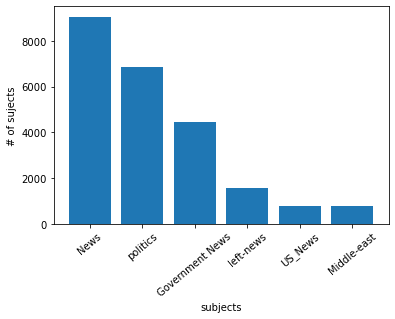

In [97]:
plt.bar(fake_data['subject'].unique(), fake_data['subject'].value_counts())
plt.xlabel('subjects')
plt.ylabel('# of sujects')
plt.xticks(rotation=40)
plt.show()

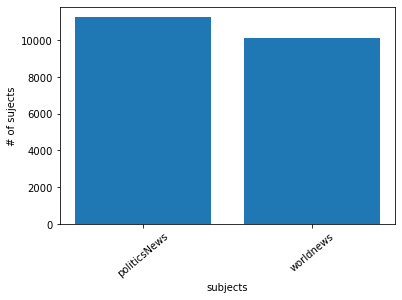

In [98]:
plt.bar(true_data['subject'].unique(), true_data['subject'].value_counts())
plt.xlabel('subjects')
plt.ylabel('# of sujects')
plt.xticks(rotation=40)
plt.show()

In [38]:
# fake_data = pd.read_csv('fake_data.csv')
# true_data = pd.read_csv('true_data.csv')

In [39]:
#!pip install wordcloud

In [40]:
# y label 추가
fake_data['is_fake'] = 1
true_data['is_fake'] = 0
fake_text = fake_data[['title_token','text_token','is_fake']]
true_text = true_data[['title_token','text_token','is_fake']]

In [42]:
dataset = pd.concat([fake_text,true_text],ignore_index=True)
dataset

,title_token,text_token,is_fake
0,"['donald', 'trump', 'sends', 'embarrassing', '...","['donald', 'trump', 'wish', 'americans', 'happ...",1
1,"['drunk', 'bragging', 'trump', 'staffer', 'sta...","['house', 'intelligence', 'committee', 'chairm...",1
2,"['sheriff', 'david', 'clarke', 'becomes', 'int...","['friday', 'revealed', 'former', 'milwaukee', ...",1
3,"['trump', 'obsessed', 'even', 'obamas', 'name'...","['christmas', 'day', 'donald', 'trump', 'annou...",1
4,"['pope', 'francis', 'called', 'donald', 'trump...","['pope', 'francis', 'used', 'annual', 'christm...",1
...,...,...,...
44893,"['fully', 'committed', 'nato', 'backs', 'new',...","['brussels', 'reuters', '-', 'nato', 'allies',...",0
44894,"['lexisnexis', 'withdrew', 'two', 'products', ...","['london', 'reuters', '-', 'lexisnexis', 'prov...",0
44895,"['minsk', 'cultural', 'hub', 'becomes', 'autho...","['minsk', 'reuters', '-', 'shadow', 'disused',...",0
44896,"['vatican', 'upbeat', 'possibility', 'pope', '...","['moscow', 'reuters', '-', 'vatican', 'secreta...",0


In [43]:
from IPython.display import set_matplotlib_formats
import matplotlib
from wordcloud import WordCloud

In [44]:
def token2text(tokens):
    ret = ""
    for w in tokens:
        ret += w
    return ret

In [45]:
text = fake_data['text_token'].apply(token2text)